**Setting Up Environment**

Run cell, click the url provided in output, sign in and copy the authentication code and paste to box in output.

In [ ]:
from google.colab import drive, auth 

In [ ]:
auth.authenticate_user() #authenticating user

In [ ]:
drive.mount("/content/drive/") #mounting drive

Mounted at /content/drive/


Go to dataset folder using linux commands

In [ ]:
%cd '/content/drive/MyDrive/PPMI/ppmi-org-data'

/content/drive/MyDrive/PPMI/ppmi-org-data


Install libraries as below.

In [ ]:
!pip install SimpleITK

In [ ]:
!pip install nilearn

In [ ]:
!pip install itk

In [ ]:
!pip install itkwidgets

Import libraries as below.

In [ ]:
import os
import cv2
import shutil
import SimpleITK as sitk
from PIL import Image
import numpy as np
import nibabel as nib                           # Read / write access to some common neuroimaging file formats                            
from nilearn import plotting                    # plotting .nii image

# Set numpy to print only 2 decimal digits for neatness
np.set_printoptions(precision=2, suppress=True)

import numpy as np
import itk                                                                # Jupyter widgets to visualize images in 2D and 3D
import itkwidgets
from ipywidgets import interact, interactive, IntSlider, ToggleButtons

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

/usr/local/lib/python3.7/dist-packages/nilearn/datasets/__init__.py:96: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


**About parkinson disease**

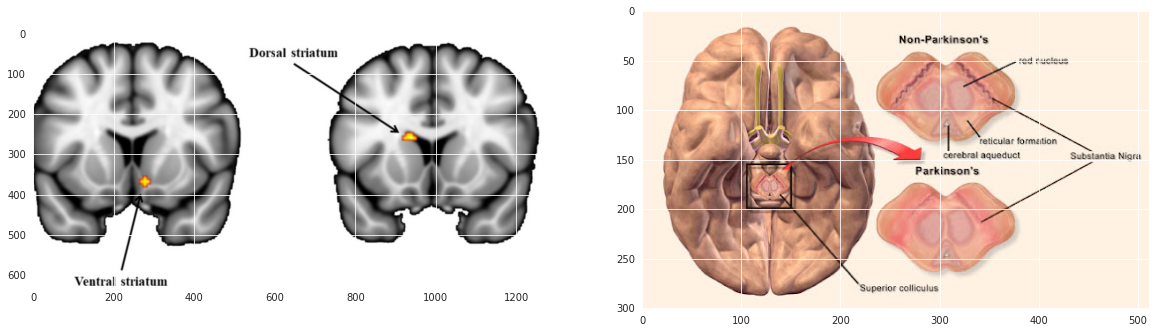

In [ ]:
from PIL import Image
img_range = Image.open('/content/drive/MyDrive/PPMI/temp/range.jpg')
img_region = Image.open('/content/drive/MyDrive/PPMI/temp/region.jpg')

fig, ax = plt.subplots(1,2,figsize = (20,20))
ax[0].imshow(img_range)
ax[1].imshow(img_region)

plt.show()

The two basic types of MRI images are T1-weighted and T2-weighted images, often referred to as T1 and T2 images.

The timing of radiofrequency pulse sequences used to make T1 images results in images which highlight fat tissue within the body.

The timing of radiofrequency pulse sequences used to make T2 images results in images which highlight fat AND fluid within the body.

T1 images – 1 tissue type is bright – **FAT**

T2 images – 2 tissue types are bright – **FAT and FLUID**

Below image is taken from https://case.edu/med/neurology/NR/MRI%20Basics.htm

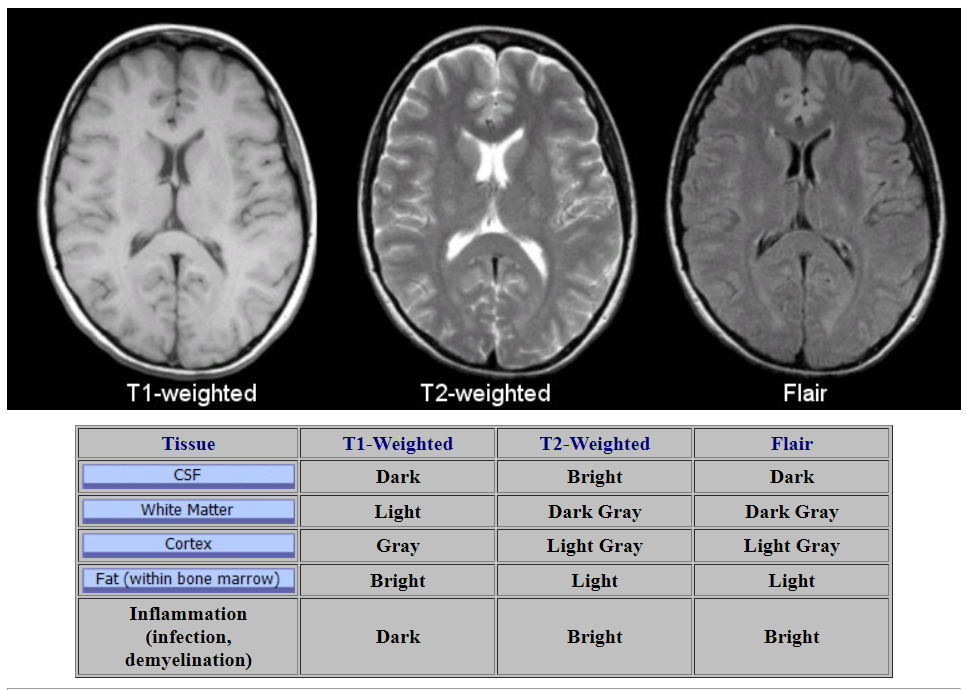

**Dataset and Image Discription**

In [ ]:
print('number of files in PD/flair : ',len(os.listdir('PD/flair')))
print('number of files in PD/nonflair : ',len(os.listdir('PD/nonflair')))
print('number of files in HC/flair : ',len(os.listdir('HC/flair')))
print('number of files in HC/nonflair : ',len(os.listdir('HC/nonflair')))

number of files in PD/flair :  99
number of files in PD/nonflair :  124
number of files in HC/flair :  34
number of files in HC/nonflair :  43


In [ ]:
# Define the image path and load the data
image_path = "PD/flair/fPD(1).nii"
image_obj = nib.load(image_path)
print(f'Type of the image {type(image_obj)}')

Type of the image <class 'nibabel.nifti1.Nifti1Image'>


In [ ]:
i1path = "PD/flair/fPD(1).nii"
i2path = "PD/nonflair/nfPD(1).nii"
i3path = "HC/flair/fHC(1).nii"
i4path = "HC/nonflair/nfHC(1).nii"
i1obj = nib.load(i1path)
i2obj = nib.load(i2path)
i3obj = nib.load(i3path)
i4obj = nib.load(i4path)
# Extract data as numpy ndarray
i1data = i1obj.get_fdata()
i2data = i2obj.get_fdata()
i3data = i3obj.get_fdata()
i4data = i4obj.get_fdata()
# Get the image shape and print it out
h1, w1, d1, c1 = i1data.shape
print(f"The image from PD/flair has the following dimensions: height: {h1}, width:{w1}, depth:{d1}, channels:{c1}")
h2, w2, d2, c2 = i2data.shape
print(f"The image from PD/nonflair has the following dimensions: height: {h2}, width:{w2}, depth:{d2}, channels:{c2}")
h3, w3, d3, c3 = i3data.shape
print(f"The image from HC/flair has the following dimensions: height: {h3}, width:{w3}, depth:{d3}, channels:{c3}")
h4, w4, d4, c4 = i4data.shape
print(f"The image from HC/nonflair has the following dimensions: height: {h4}, width:{w4}, depth:{d4}, channels:{c4}")

The image from PD/flair has the following dimensions: height: 256, width:256, depth:32, channels:1
The image from PD/nonflair has the following dimensions: height: 228, width:256, depth:48, channels:1
The image from HC/flair has the following dimensions: height: 512, width:512, depth:18, channels:1
The image from HC/nonflair has the following dimensions: height: 512, width:512, depth:78, channels:1


**Data Visualization and plotting**

Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
Given img is empty. Returning default cut_coords=(0.0, 0.0, 0.0) instead.



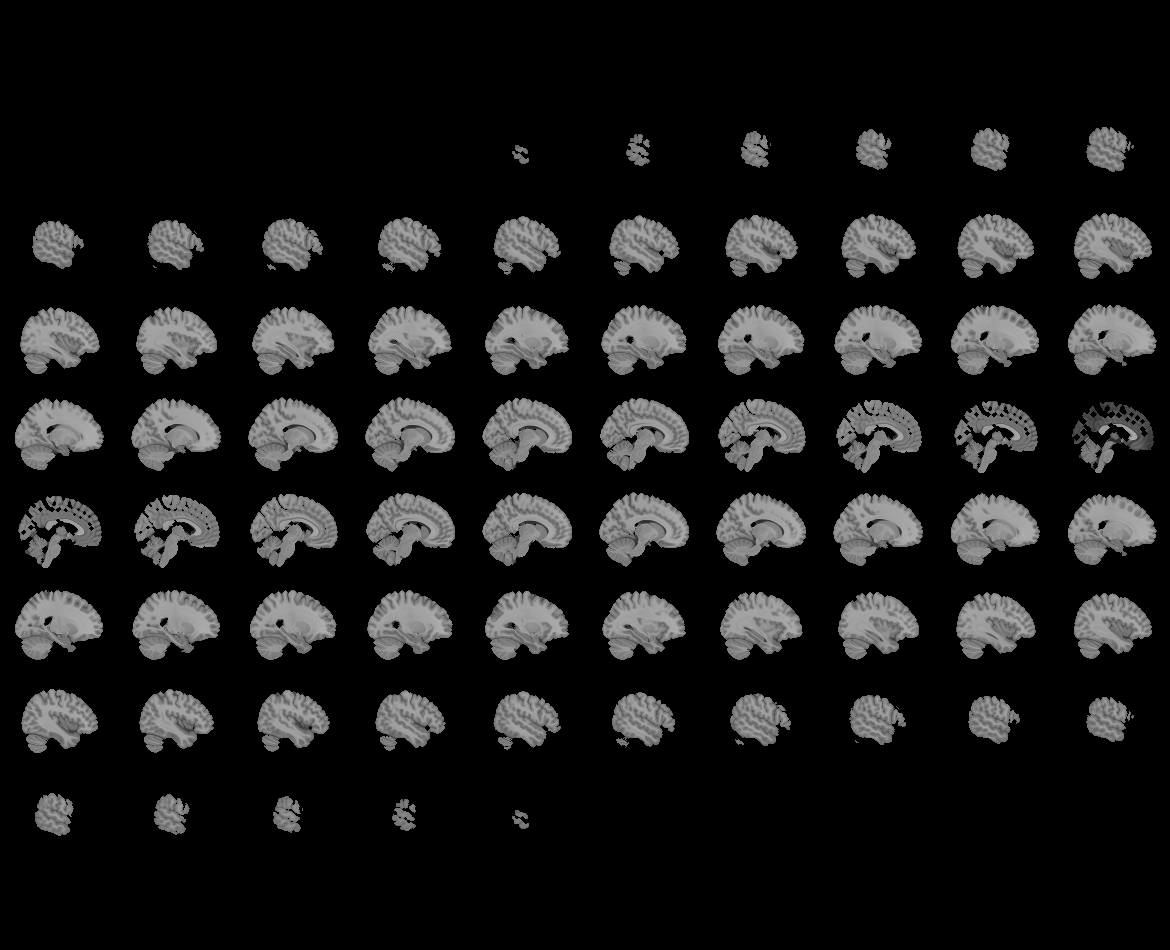
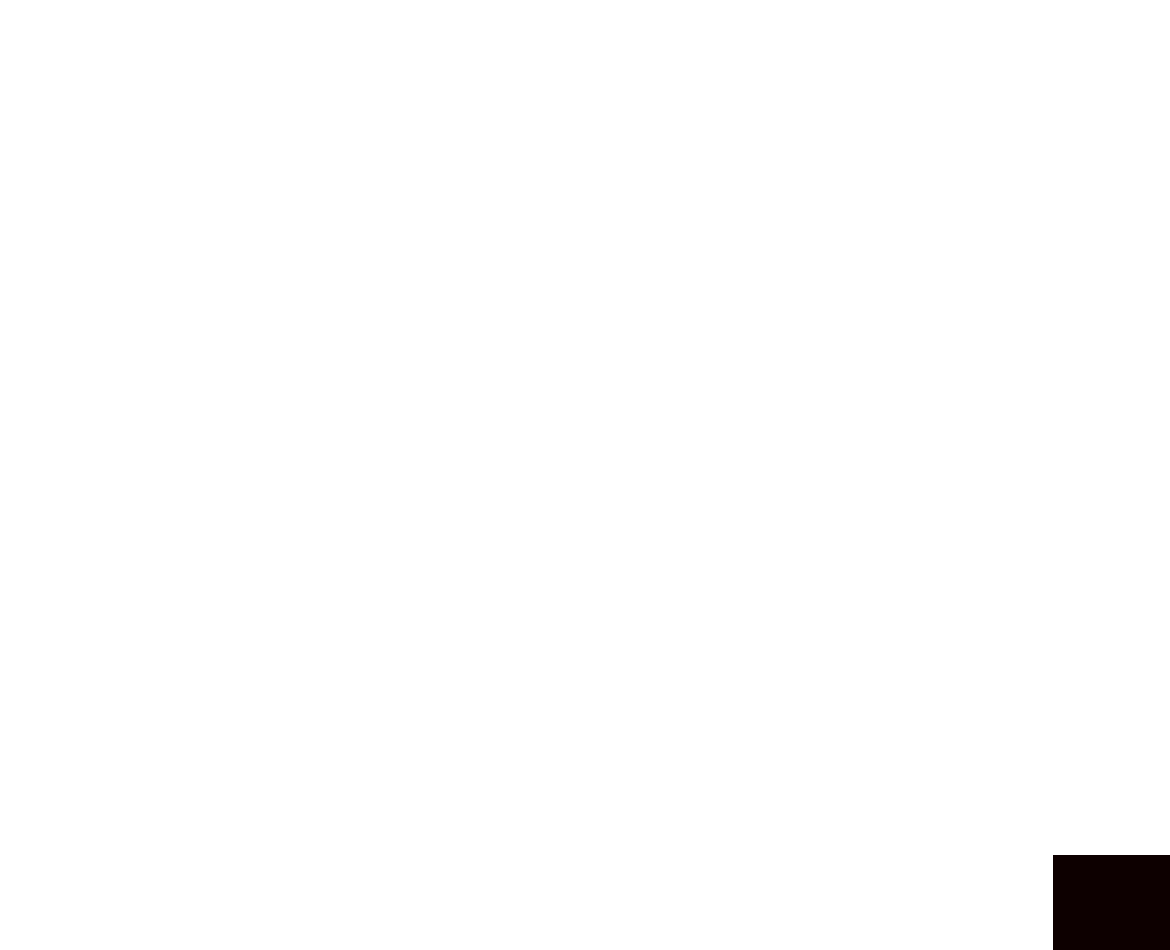

In [ ]:
plotting.view_img('PD/flair/fPD(1).nii')

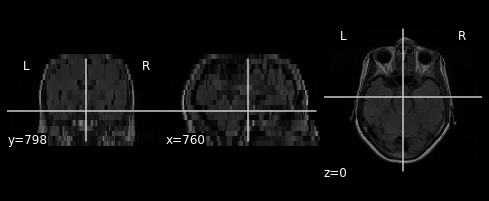

In [ ]:
plotting.plot_anat('HC/flair/fHC(1).nii')

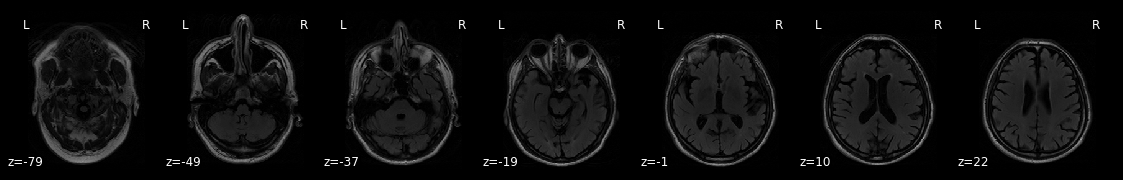

In [ ]:
plotting.plot_anat('PD/flair/fPD(1).nii', draw_cross=False, display_mode='z')

In [ ]:
# Define a function to visualize the data
def explore_3dimage(layer):
    plt.figure(figsize=(10, 5))
    channel = 0
    plt.imshow(image_data[:, :, layer, channel], cmap='gray');
    plt.title('Explore Layers of Brain MRI', fontsize=20)
    plt.axis('off')
    return layer
    
# Run the ipywidgets interact() function to explore the data
image_path = "PD/flair/fPD(1).nii"
image_obj = nib.load(image_path)
image_data = image_obj.get_fdata()
interact(explore_3dimage, layer=(0, image_data.shape[2] - 1));

interactive(children=(IntSlider(value=15, description='layer', max=31), Output()), _dom_classes=('widget-inter…

In [ ]:
# Create button values
select_class = ToggleButtons(
    options=['HC/flair/','HC/nonflair/', 'PD/flair/', 'PD/nonflair/'],
    description='Select Class:',
    disabled=False,
    button_style='info', 
    
)
# Create layer slider
select_layer = IntSlider(min=0, max=100, description='Select Layer', continuous_update=False)

#Create image number slider
select_image_number = IntSlider(min=1, max=124, description='Select image number', continuous_update = False)

    
# Define a function for plotting images
def plot_image(seg_class, layer, number):
    if seg_class == 'HC/flair/':
      if number > 34:
        number = 34
      img_path = f'{seg_class}fHC({number}).nii'
    elif seg_class == 'HC/nonflair/':
      if number > 43:
        number = 43
      img_path = f'{seg_class}nfHC({number}).nii'
    elif seg_class == 'PD/flair/':
      if number > 99:
        number = 99
      img_path = f'{seg_class}fPD({number}).nii'
    else:
      img_path = f'{seg_class}nfPD({number}).nii'

    channel = 0
    img_obj = nib.load(img_path)
    img_data = img_obj.get_fdata()
    if layer >= img_data.shape[2]:
      layer = img_data.shape[2]-1
    print(f"Plotting {layer} Layer Label: " + img_path)
    plt.figure(figsize=(10,5))
    plt.imshow(img_data[:, :, layer, channel], cmap='gray');
    plt.axis('off')

# Use the interactive() tool to create the visualization
interactive(plot_image, seg_class=select_class, layer=select_layer, number=select_image_number)

interactive(children=(ToggleButtons(button_style='info', description='Select Class:', options=('HC/flair/', 'H…

**Preprocessing Techniques**


**N4 BIAS FIELD CORRECTION**

The N4 bias field correction algorithm is a popular method for correcting low frequency intensity non-uniformity present in MRI image data known as a bias or gain field. 

In [ ]:
def ApplyN4FieldBiasCorrection(dir_path, output_path):
    for filename in os.listdir(dir_path):
        if filename.endswith(".nii"): 
            path = dir_path+"/"+filename
            inputImg = sitk.ReadImage(path)
            maskImg = sitk.OtsuThreshold(inputImg, 0, 1, 200)
            inputImg = sitk.Cast(inputImg, sitk.sitkFloat32)
            corrector = sitk.N4BiasFieldCorrectionImageFilter()
            output = corrector.Execute(inputImg, maskImg)
            sitk.WriteImage(output, output_path+'/'+filename)
        else:
            continue

ApplyN4FieldBiasCorrection('/content/drive/MyDrive/PPMI/ppmi-org-data/HC/flair','/content/drive/MyDrive/PPMI/N4_bias_corrected_images/HC')
ApplyN4FieldBiasCorrection('/content/drive/MyDrive/PPMI/ppmi-org-data/PD/flair','/content/drive/MyDrive/PPMI/N4_bias_corrected_images/PD')

**Converting to PNG**

In [ ]:
def convertToPNG(dir_path, output_path):
    for filename in os.listdir(dir_path):
        if filename.endswith(".nii"): 
            path = dir_path+"/"+filename
            obj = nib.load(path)
            data = obj.get_fdata()
            data = data[:,:,:]
            names = filename.split('.')
            fileName = names[0]
            for i in range(data.shape[2]//6, data.shape[2]-(data.shape[2]//6)):
              img = data[:,:,i]
              plt.imsave(output_path+"/"+fileName+str(i)+".png", img, cmap='gray')
        else:
            continue

convertToPNG('/content/drive/MyDrive/PPMI/N4_bias_corrected_images/HC', '/content/drive/MyDrive/PPMI/PNG_images/HC')
convertToPNG('/content/drive/MyDrive/PPMI/N4_bias_corrected_images/PD', '/content/drive/MyDrive/PPMI/PNG_images/PD')

We will extract frames 5 to 15, because substantia nigra is mostly visible in these frames and other frames are useless data.

In [ ]:
def getImportantFrames(dir_path, output_path):
  for filename in os.listdir(dir_path):
    if filename.endswith('.png'):
      name = filename.split('.')
      frame = name[0].split(')')
      frame_number = int(frame[1])
      if frame_number >= 5 and frame_number <= 15:
        shutil.move(dir_path+"/"+filename, output_path+"/"+filename)

getImportantFrames('/content/drive/MyDrive/PPMI/PNG_images/HC','/content/drive/MyDrive/PPMI/imp_images/HC')
getImportantFrames('/content/drive/MyDrive/PPMI/PNG_images/PD','/content/drive/MyDrive/PPMI/imp_images/PD')

**Contrast Limited Adaptive Histogram Equalization**

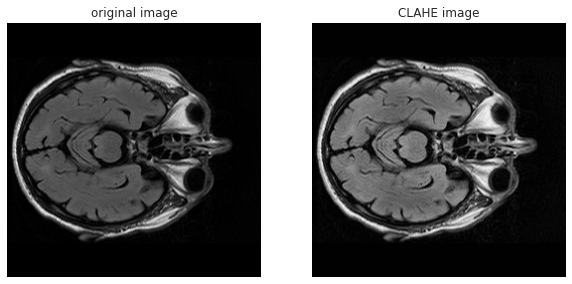

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,10))

inputImg = cv2.imread('/content/drive/MyDrive/PPMI/imp_images/PD/fPD(1)12.png',0)
clahe = cv2.createCLAHE(clipLimit = 1)
outputImg = clahe.apply(inputImg) 

ax[0].axis('off')
ax[0].title.set_text('original image')
ax[0].imshow(inputImg, cmap='gray')

ax[1].axis('off')
ax[1].title.set_text('CLAHE image')
ax[1].imshow(outputImg, cmap='gray')
plt.show()


**Median filter** (not producing good results)

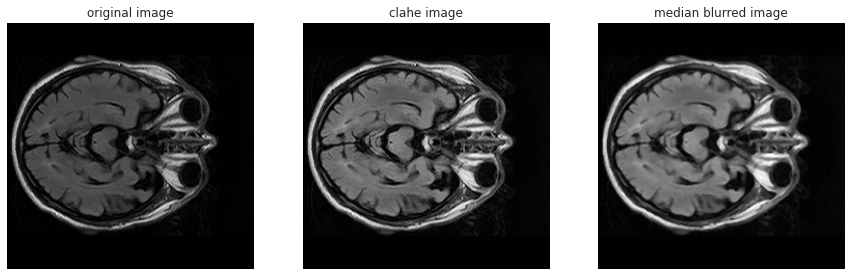

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(15,15))

inputImg = cv2.imread('/content/drive/MyDrive/PPMI/imp_images/PD/fPD(1)13.png',0)
clahe = cv2.createCLAHE(clipLimit = 1)
claheImg = clahe.apply(inputImg) 
outputImg = cv2.medianBlur(claheImg, 3)

ax[0].axis('off')
ax[0].title.set_text('original image')
ax[0].imshow(inputImg, cmap='gray')

ax[1].axis('off')
ax[1].title.set_text('clahe image')
ax[1].imshow(claheImg, cmap='gray')

ax[2].axis('off')
ax[2].title.set_text('median blurred image')
ax[2].imshow(outputImg, cmap='gray')
plt.show()

**Bilateral filter**

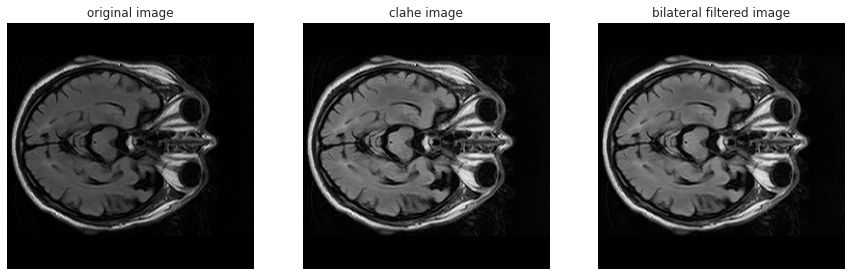

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(15,15))

inputImg = cv2.imread('/content/drive/MyDrive/PPMI/imp_images/PD/fPD(1)13.png',0)
clahe = cv2.createCLAHE(clipLimit = 1)
claheImg = clahe.apply(inputImg) 
outputImg = cv2.bilateralFilter(claheImg, 3, 5, 5)

ax[0].axis('off')
ax[0].title.set_text('original image')
ax[0].imshow(inputImg, cmap='gray')

ax[1].axis('off')
ax[1].title.set_text('clahe image')
ax[1].imshow(claheImg, cmap='gray')

ax[2].axis('off')
ax[2].title.set_text('bilateral filtered image')
ax[2].imshow(outputImg, cmap='gray')
plt.show()

**Normalization**

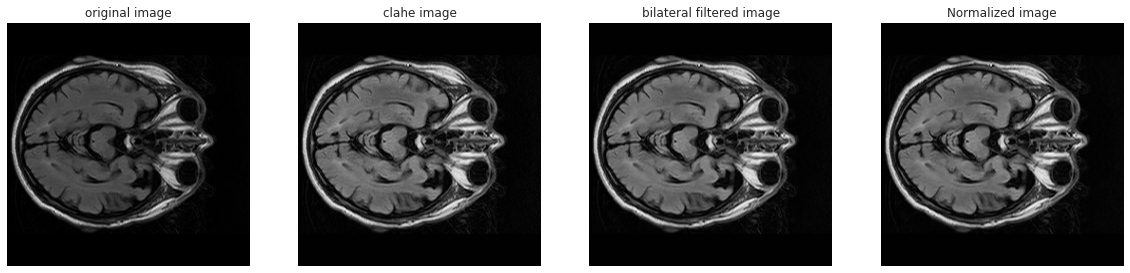

In [ ]:
fig, ax = plt.subplots(1,4,figsize=(20,20))

inputImg = cv2.imread('/content/drive/MyDrive/PPMI/imp_images/PD/fPD(1)13.png',0)
clahe = cv2.createCLAHE(clipLimit = 1)
claheImg = clahe.apply(inputImg) 
bilateralImg = cv2.bilateralFilter(claheImg, 3, 5, 5)
norm_img = np.zeros((800,800))
outputImg = cv2.normalize(bilateralImg,  norm_img, 0, 255, cv2.NORM_MINMAX)

ax[0].axis('off')
ax[0].title.set_text('original image')
ax[0].imshow(inputImg, cmap='gray')

ax[1].axis('off')
ax[1].title.set_text('clahe image')
ax[1].imshow(claheImg, cmap='gray')

ax[2].axis('off')
ax[2].title.set_text('bilateral filtered image')
ax[2].imshow(bilateralImg, cmap='gray')

ax[3].axis('off')
ax[3].title.set_text('Normalized image')
ax[3].imshow(outputImg, cmap='gray')
plt.show()

**Erosion** (not producing good results)

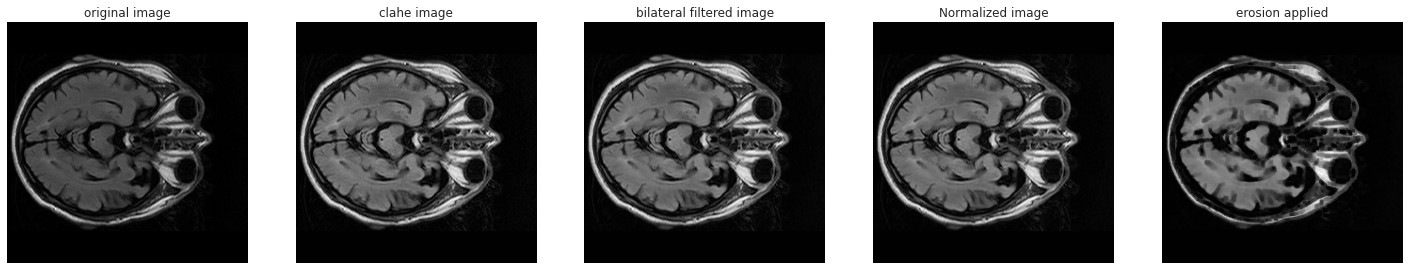

In [ ]:
fig, ax = plt.subplots(1, 5, figsize=(25,25))

inputImg = cv2.imread('/content/drive/MyDrive/PPMI/imp_images/PD/fPD(1)13.png',0)
clahe = cv2.createCLAHE(clipLimit = 1)
claheImg = clahe.apply(inputImg) 
bilateralImg = cv2.bilateralFilter(claheImg, 3, 5, 5)
norm_img = np.zeros((800,800))
normalImg = cv2.normalize(bilateralImg,  norm_img, 0, 255, cv2.NORM_MINMAX)
kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(normalImg,kernel,iterations = 1)

ax[0].axis('off')
ax[0].title.set_text('original image')
ax[0].imshow(inputImg, cmap="gray")

ax[1].axis('off')
ax[1].title.set_text('clahe image')
ax[1].imshow(claheImg, cmap='gray')

ax[2].axis('off')
ax[2].title.set_text('bilateral filtered image')
ax[2].imshow(bilateralImg, cmap='gray')

ax[3].axis('off')
ax[3].title.set_text('Normalized image')
ax[3].imshow(normalImg, cmap='gray')

ax[4].axis('off')
ax[4].title.set_text('erosion applied')
ax[4].imshow(erosion, cmap="gray")
plt.show()

cropping center part where substantia nigra is situated, every image will reshaped to (200, 200)

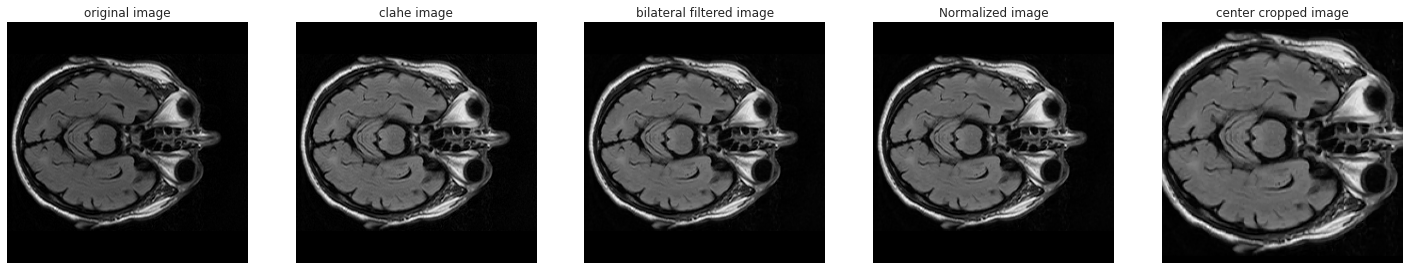

In [ ]:
fig, ax = plt.subplots(1, 5, figsize=(25,25))

inputImg = cv2.imread('/content/drive/MyDrive/PPMI/imp_images/PD/fPD(1)12.png',0)
clahe = cv2.createCLAHE(clipLimit = 0.5)
claheImg = clahe.apply(inputImg) 
bilateralImg = cv2.bilateralFilter(claheImg, 3, 5, 5)
norm_img = np.zeros((800,800))
normalImg = cv2.normalize(bilateralImg,  norm_img, 0, 255, cv2.NORM_MINMAX)
width, height = normalImg.shape[1], normalImg.shape[0]
dim1, dim2 = 200, 200
crop_width = dim1 if dim1<normalImg.shape[1] else normalImg.shape[1]
crop_height = dim2 if dim2<normalImg.shape[0] else normalImg.shape[0]
mid_x, mid_y = int(width/2)-15, int(height/2)
cw2, ch2 = int(crop_width/2), int(crop_height/2) 
crop_img = normalImg[mid_y-ch2:mid_y+ch2, mid_x-cw2:mid_x+cw2]

ax[0].axis('off')
ax[0].title.set_text('original image')
ax[0].imshow(inputImg, cmap="gray")

ax[1].axis('off')
ax[1].title.set_text('clahe image')
ax[1].imshow(claheImg, cmap='gray')

ax[2].axis('off')
ax[2].title.set_text('bilateral filtered image')
ax[2].imshow(bilateralImg, cmap='gray')

ax[3].axis('off')
ax[3].title.set_text('Normalized image')
ax[3].imshow(normalImg, cmap='gray')

ax[4].axis('off')
ax[4].title.set_text('center cropped image')
ax[4].imshow(crop_img, cmap="gray")
plt.show()

preprocessing images with above scheme

In [ ]:
s = []
for filename in os.listdir('/content/drive/MyDrive/PPMI/imp_images/HC'):
  img = cv2.imread('/content/drive/MyDrive/PPMI/imp_images/HC/'+filename)
  s.append(img.shape)
print('shapes in HC',set(s))

shapes in HC {(288, 288, 3), (384, 512, 3), (256, 256, 3), (512, 512, 3)}


In [ ]:
s = []
for filename in os.listdir('/content/drive/MyDrive/PPMI/imp_images/PD'):
  img = cv2.imread('/content/drive/MyDrive/PPMI/imp_images/PD/'+filename)
  s.append(img.shape)
print('shapes in PD',set(s))

shapes in PD {(560, 560, 3), (320, 320, 3), (512, 512, 3), (384, 512, 3), (256, 256, 3)}


Resize the image to (256,256) and then center crop it to (200,200)

In [ ]:
def preprocessImage(dir_path, output_path):
    for filename in os.listdir(dir_path):
        if filename.endswith(".png"): 
            path = dir_path+"/"+filename
            inputImg = cv2.imread(path,0)
            clahe = cv2.createCLAHE(clipLimit = 0.5)
            claheImg = clahe.apply(inputImg) 
            bilateralImg = cv2.bilateralFilter(claheImg, 3, 5, 5)
            norm_img = np.zeros((800,800))
            normalImg = cv2.normalize(bilateralImg,  norm_img, 0, 255, cv2.NORM_MINMAX)
            normalImg = cv2.resize(normalImg, (256,256))
            width, height = normalImg.shape[1], normalImg.shape[0]
            dim1, dim2 = 200, 200
            crop_width = dim1 if dim1<normalImg.shape[1] else normalImg.shape[1]
            crop_height = dim2 if dim2<normalImg.shape[0] else normalImg.shape[0]
            mid_x, mid_y = int(width/2), int(height/2)
            cw2, ch2 = int(crop_width/2), int(crop_height/2) 
            crop_img = normalImg[mid_y-ch2:mid_y+ch2, mid_x-cw2:mid_x+cw2]
            plt.imsave(output_path+"/"+filename, crop_img, cmap='gray')
        else:
            continue

preprocessImage('/content/drive/MyDrive/PPMI/imp_images/HC', '/content/drive/MyDrive/PPMI/clahe_bilateral_normalize_centercrop_images/HC')
preprocessImage('/content/drive/MyDrive/PPMI/imp_images/PD', '/content/drive/MyDrive/PPMI/clahe_bilateral_normalize_centercrop_images/PD')

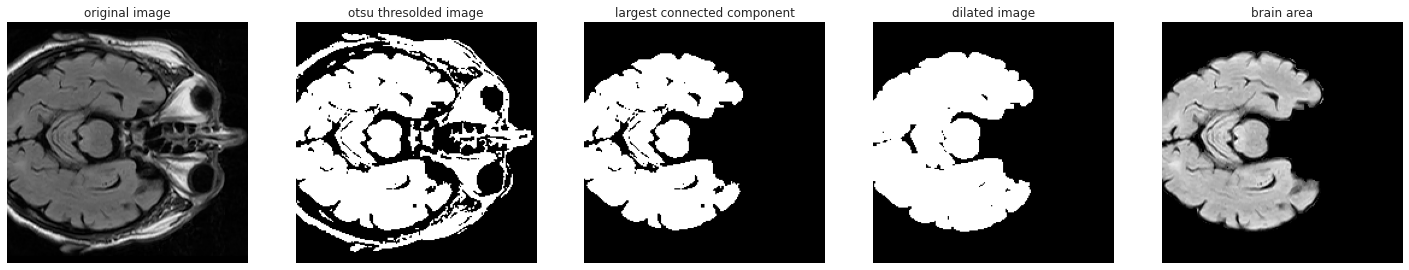

In [ ]:
img = cv2.imread('/content/drive/MyDrive/PPMI/clahe_bilateral_normalize_centercrop_images/PD/fPD(1)12.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,thr = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)
new_img = np.zeros_like(thr)                                        
for val in np.unique(thr)[1:]:                                      
    mask = np.uint8(thr == val)                                     
    labels, stats = cv2.connectedComponentsWithStats(mask, 4)[1:3]  
    largest_label = 1 + np.argmax(stats[1:, cv2.CC_STAT_AREA])      
    new_img[labels == largest_label] = val                         
kernel = np.ones((3,3),np.uint8)
d = cv2.dilate(new_img,kernel,iterations = 1)
temp = d
while(True):
  di = cv2.dilate(d, kernel, iterations=1)
  di = cv2.bitwise_and(di, img)
  if di.all() == d.all():
    break
  d = di

fig, ax = plt.subplots(1, 5, figsize = (25,25))

ax[0].axis('off')
ax[0].title.set_text('original image')
ax[0].imshow(img, cmap="gray")

ax[1].axis('off')
ax[1].title.set_text('otsu thresolded image')
ax[1].imshow(thr, cmap='gray')

ax[2].axis('off')
ax[2].title.set_text('largest connected component')
ax[2].imshow(new_img, cmap='gray')

ax[3].axis('off')
ax[3].title.set_text('dilated image')
ax[3].imshow(temp, cmap='gray')

ax[4].axis('off')
ax[4].title.set_text('brain area')
ax[4].imshow(di, cmap="gray")
plt.show()

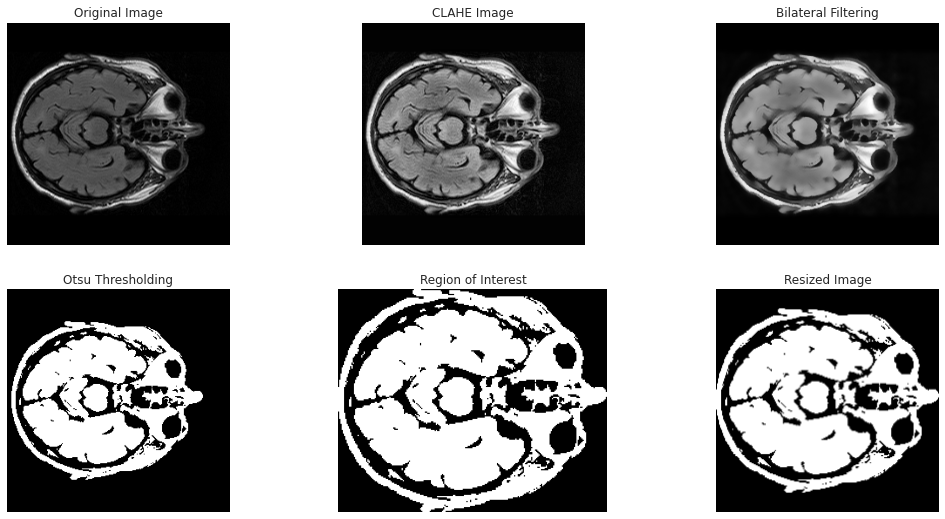

In [ ]:
def resize_image(img, size=(28,28)):
    h, w = img.shape[:2]
    c = img.shape[2] if len(img.shape)>2 else 1
    if h == w: 
        return cv2.resize(img, size, cv2.INTER_AREA)
    dif = h if h > w else w
    interpolation = cv2.INTER_AREA if dif > (size[0]+size[1])//2 else cv2.INTER_CUBIC
    x_pos = (dif - w)//2
    y_pos = (dif - h)//2
    if len(img.shape) == 2:
        mask = np.zeros((dif, dif), dtype=img.dtype)
        mask[y_pos:y_pos+h, x_pos:x_pos+w] = img[:h, :w]
    else:
        mask = np.zeros((dif, dif, c), dtype=img.dtype)
        mask[y_pos:y_pos+h, x_pos:x_pos+w, :] = img[:h, :w, :]
    return cv2.resize(mask, size, interpolation)

img = cv2.imread('/content/drive/MyDrive/PPMI/imp_images/PD/fPD(1)12.png',0)
# CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0)
equ = clahe.apply(img)

# Smoothing
blur = cv2.bilateralFilter(equ, 9, 35, 35)

# OTSU Thresholding
ret,thresh = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# ROI using Contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

max_area = -1
index = -1
for i, contour in enumerate(contours):
    area = cv2.contourArea(contour)
    if area > max_area:
        max_area = area
        index = i

x, y, w, h = cv2.boundingRect(contours[index])

im = cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB)
cv2.drawContours(im, contours, index, (0,255,0), 2)
im = cv2.rectangle(im,(x,y),(x+w,y+h),(0,0,255),2)
roi = thresh[y:y+h, x:x+w]

# Resizing
out = resize_image(roi, (224,224))

titles = ['Original Image', 'CLAHE Image', 'Bilateral Filtering', 'Otsu Thresholding', 'Region of Interest', 'Resized Image']
images = [img, equ, blur, thresh, roi, out]

plt.figure(figsize=(18,9))
for i in range(6):
    plt.subplot(2,3,(i+1))
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
    
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten, BatchNormalization, Input, Concatenate
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical, plot_model
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

In [ ]:
aug = ImageDataGenerator(rotation_range = 20, brightness_range = [0.7,1.3], horizontal_flip = True, fill_mode = 'nearest')

path = "/content/HC_png"
for img in os.listdir(path):
    img_path = os.path.join(path, img)
    image = cv2.imread(img_path)
    image = np.expand_dims(image, axis=0)
        
    image_gen = aug.flow(image, batch_size=1, save_to_dir = "/content/HC_aug", save_prefix = img.split(".")[0], save_format = "png")
        
    total = 0
    for image in image_gen:
	    total += 1
	    if total == 20:
		    break

#Applying preprocessing techniques on a random image from the directory

**Applied Otsu Thresholding and normalised image**

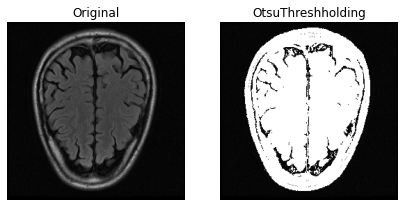

In [ ]:
PD_flair_dir1 = "/content/drive/MyDrive/Sem 7/MinorProject/ppmi-org-data/MadeByMe"
PD_flair_dir1_list = os.listdir(PD_flair_dir1)
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np
import random 

randomnum = random.randint(0,98)

def preprocess(img):
  img = cv2.cvtColor(np.uint8(img), cv2.COLOR_RGB2GRAY)
  img2 = img
  img2 = cv2.equalizeHist(img2.astype(np.uint8))
  ret, img2 = cv2.threshold(img2, 0, 255, cv2.THRESH_OTSU)
  finalimg = cv2.subtract(img2,img)
  ret, finalimg = cv2.threshold(finalimg, 0, 255,  cv2.THRESH_OTSU)
  finalimg = img2 + cv2.subtract(img,finalimg)
  #normalised_img = np.array(cv2.cvtColor(finalimg, cv2.COLOR_GRAY2RGB))/255.0
  return np.array(cv2.cvtColor(finalimg, cv2.COLOR_GRAY2RGB))/255.0

fig, ax = plt.subplots(1,2,figsize=(7,7))
image = tf.keras.preprocessing.image.load_img(PD_flair_dir1+'/'+PD_flair_dir1_list[randomnum])

ax[0].axis("off")
ax[0].title.set_text("Original")
ax[0].imshow(image)

img = preprocess(image)
ax[1].axis("off")
ax[1].title.set_text("OtsuThreshholding")
ax[1].imshow(img)

plt.show()



**Cropping the image to center**

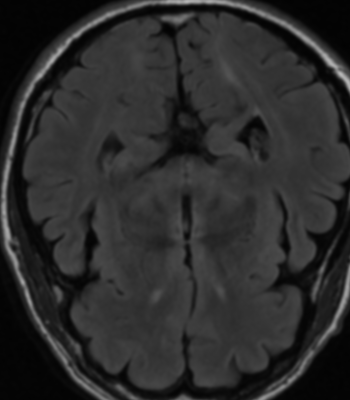

In [ ]:
from google.colab.patches import cv2_imshow
image = cv2.imread('/content/drive/MyDrive/Sem 7/MinorProject/ppmi-org-data/MadeByMe/PD_flair_fPD(60.jpg')
#image = cv2.imread(PD_flair_dir1+'/'+PD_flair_dir1_list[randomnum])

#cv2_imshow(image)

# convert the image to grayscale and blur it slightly
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (7, 7), 0)

width, height = blurred.shape[1], blurred.shape[0]
dim1, dim2 = 350,400
crop_width = dim1 if dim1<blurred.shape[1] else blurred.shape[1]
crop_height = dim2 if dim2<blurred.shape[0] else blurred.shape[0]
mid_x, mid_y = int(width/2)-15, int(height/2)
cw2, ch2 = int(crop_width/2), int(crop_height/2) 
crop_img = blurred[mid_y-ch2:mid_y+ch2, mid_x-cw2:mid_x+cw2]
cv2_imshow(crop_img)


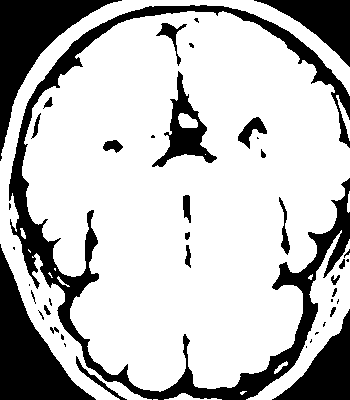

In [ ]:
(T, threshInv) = cv2.threshold(crop_img, np.mean(blurred), 255,cv2.THRESH_BINARY)
cv2_imshow(threshInv)
#cv2.threshold(img, np.mean(img), 255, cv2.THRESH_BINARY_INV)

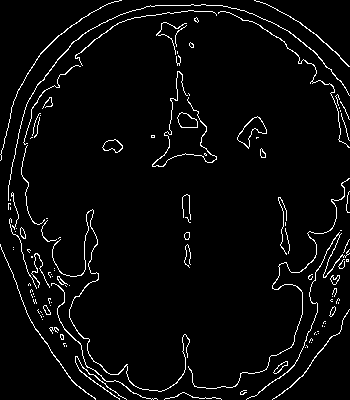

In [ ]:
edges = cv2.Canny(threshInv, 10, 200)
cv2_imshow(edges)

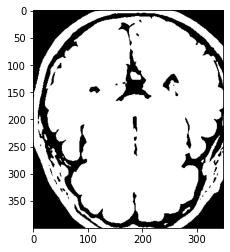

In [ ]:
binary_mask = crop_img > T

fig, ax = plt.subplots()
plt.imshow(binary_mask, cmap='gray')
plt.show()

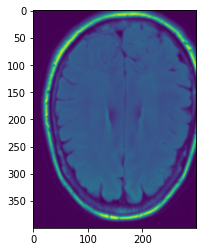

In [ ]:
"""# apply the binary mask to select the foreground
selection = np.zeros_like(threshInv)
selection[binary_mask] = threshInv[binary_mask]

fig, ax = plt.subplots()
plt.imshow(selection)
plt.show()
"""

#Segmentation - Largest Connected component

In [ ]:
ret, thresh_custom = cv2.threshold(crop_img,0,255,cv2.THRESH_BINARY+ cv2.THRESH_OTSU)

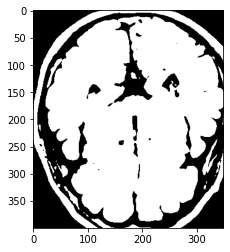

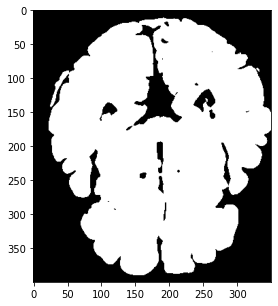

In [ ]:
temp = crop_img
plt.imshow(crop_img, cmap = 'gray')
_,binarized = cv2.threshold(crop_img, 0 , 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

foreground_value = 255
#mask = np.zeros((400,300), np.uint8(binarized == foreground_value))
mask = np.uint8(binarized == foreground_value)
mask_inv = cv2.bitwise_not(mask)
labels,stats = cv2.connectedComponentsWithStats(mask,4)[1:3]
largest_label = 1+ np.argmax(stats[1:, cv2.CC_STAT_AREA])
llc = np.zeros_like(binarized)
llc[labels == largest_label] = foreground_value

plt.imshow(binarized, cmap= 'gray')
fig,ax = plt.subplots(ncols=1,nrows=1,figsize = (5,5))
plt.imshow(llc, cmap='gray')



(15, 15) kernel-value


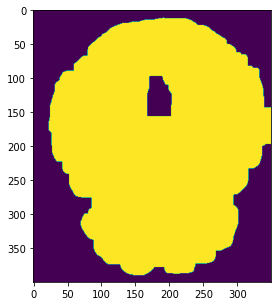

In [ ]:
#mathematical morphology
kernel = np.ones((15,15), np.uint8)
llc_closing_image = cv2.morphologyEx(llc, cv2.MORPH_CLOSE, kernel)
print(kernel.shape, "kernel-value")
fig,ax = plt.subplots(ncols=1,nrows=1,figsize = (5,5))
plt.imshow(llc_closing_image)


**Skull-Stripping**

In [ ]:
skull_stripped_image = cv2.bitwise_and(crop_img,crop_img, mask = llc_closing_image)
brain_pixels = skull_stripped_image[llc_closing_image == foreground_value]
#print(brain_pixels, "skull-stripping brain pixels value")
#plt.imshow(brain_pixels)

In [ ]:
#Adapting the data to k-means
kmeans_input = np.float32(brain_pixels.reshape(brain_pixels.shape[0],brain_pixels.ndim))
print(kmeans_input, "k-means value")

[[37.]
 [37.]
 [37.]
 ...
 [43.]
 [40.]
 [36.]] k-means value


In [ ]:
#K-means parameters
epsilon = 0.01
iterations  = 10
clusters = 3
repetition = 10
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, iterations, epsilon)
flags = cv2.KMEANS_RANDOM_CENTERS
print(criteria,"criteria Kmeans parameters")

(3, 10, 0.01) criteria Kmeans parameters


In [ ]:
#K-means Segmentation
_,labels,centers = cv2.kmeans(kmeans_input, clusters, None, criteria, repetition, flags)
print(labels.shape,"K-means Segmentation")
#plt.imshow(labels)

(90478, 1) K-means Segmentation


In [ ]:
#adapting the labels
labels = labels.flatten('F')
for x in range(clusters):
  labels[labels == x] = centers[x]

#Segmented Image

(400, 350) Segmented image value
(90478,)


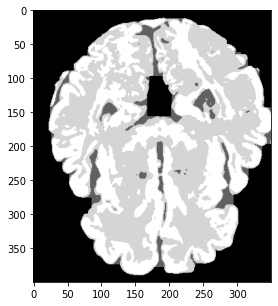

In [ ]:
segmented_image = np.zeros_like(llc_closing_image)
segmented_image[llc_closing_image==foreground_value] = labels
print(segmented_image.shape,"Segmented image value")
print(labels.shape)
#ShowImage('Brain with skull XXX', segmented_image, 'gray')
fig,ax = plt.subplots(ncols=1,nrows=1,figsize = (5,5))
plt.imshow(segmented_image, cmap = 'gray')

In [ ]:
def image_show(image, nrows = 1 , ncols = 1, cmap ='gray'):
  fig,ax =plt.subplots(nrows = nrows, ncols = ncols, figsize = (9,9))
  ax.imshow(image,)
  ax.axis('off')
  return fig,ax

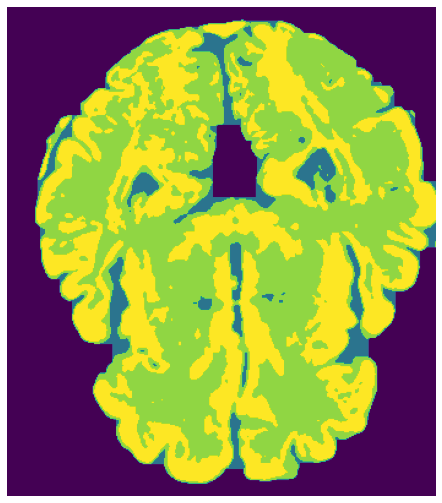

In [ ]:
#points = circle_points(200,[128,128],30)[:-1]
#snake = seg.active_contour(segmented_image, points)
fig,ax = image_show(segmented_image)
#ax.plot(snake[:,0], snake[:,1], '-r', lw=3)